<a href="https://colab.research.google.com/github/sujirou/potholeDetectionYoloV8/blob/main/PotholeDetectionUsingYOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
!nvidia-smi

Wed Apr 24 00:53:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
HOME = os.getcwd()

In [6]:
print(HOME)

/content


In [7]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 8.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [8]:
import ultralytics

In [9]:
ultralytics.checks()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
!mkdir {HOME}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists


In [ ]:
%cd {HOME}/datasets

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QUWMCW70c1dPy9pc03sQ")
project = rf.workspace("hiteshram").project("object-detection-bounding-box-ftfs5")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Object-Detection-(Bounding-Box)-1 in yolov5pytorch:: 100%|██████████| 800/800 [00:00<00:00, 5737.57it/s]


In [ ]:
!pip install fastapi kaleido python_multipart uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


In [ ]:
%cd {HOME}

/content


In [ ]:
%cd {dataset.location}

/content/Object-Detection-(Bounding-Box)-1


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/drive/MyDrive/potholedetection/data.yaml epochs=70 imgsz=640


/content
100% 49.7M/49.7M [00:00<00:00, 235MB/s]
Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/potholedetection/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=Non

In [ ]:
!ls {HOME}//runs/detect/train

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch300.jpg
confusion_matrix.png				    R_curve.png       train_batch301.jpg
events.out.tfevents.1698694063.5b4e6bf2fb2f.3488.0  results.csv       train_batch302.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


/content


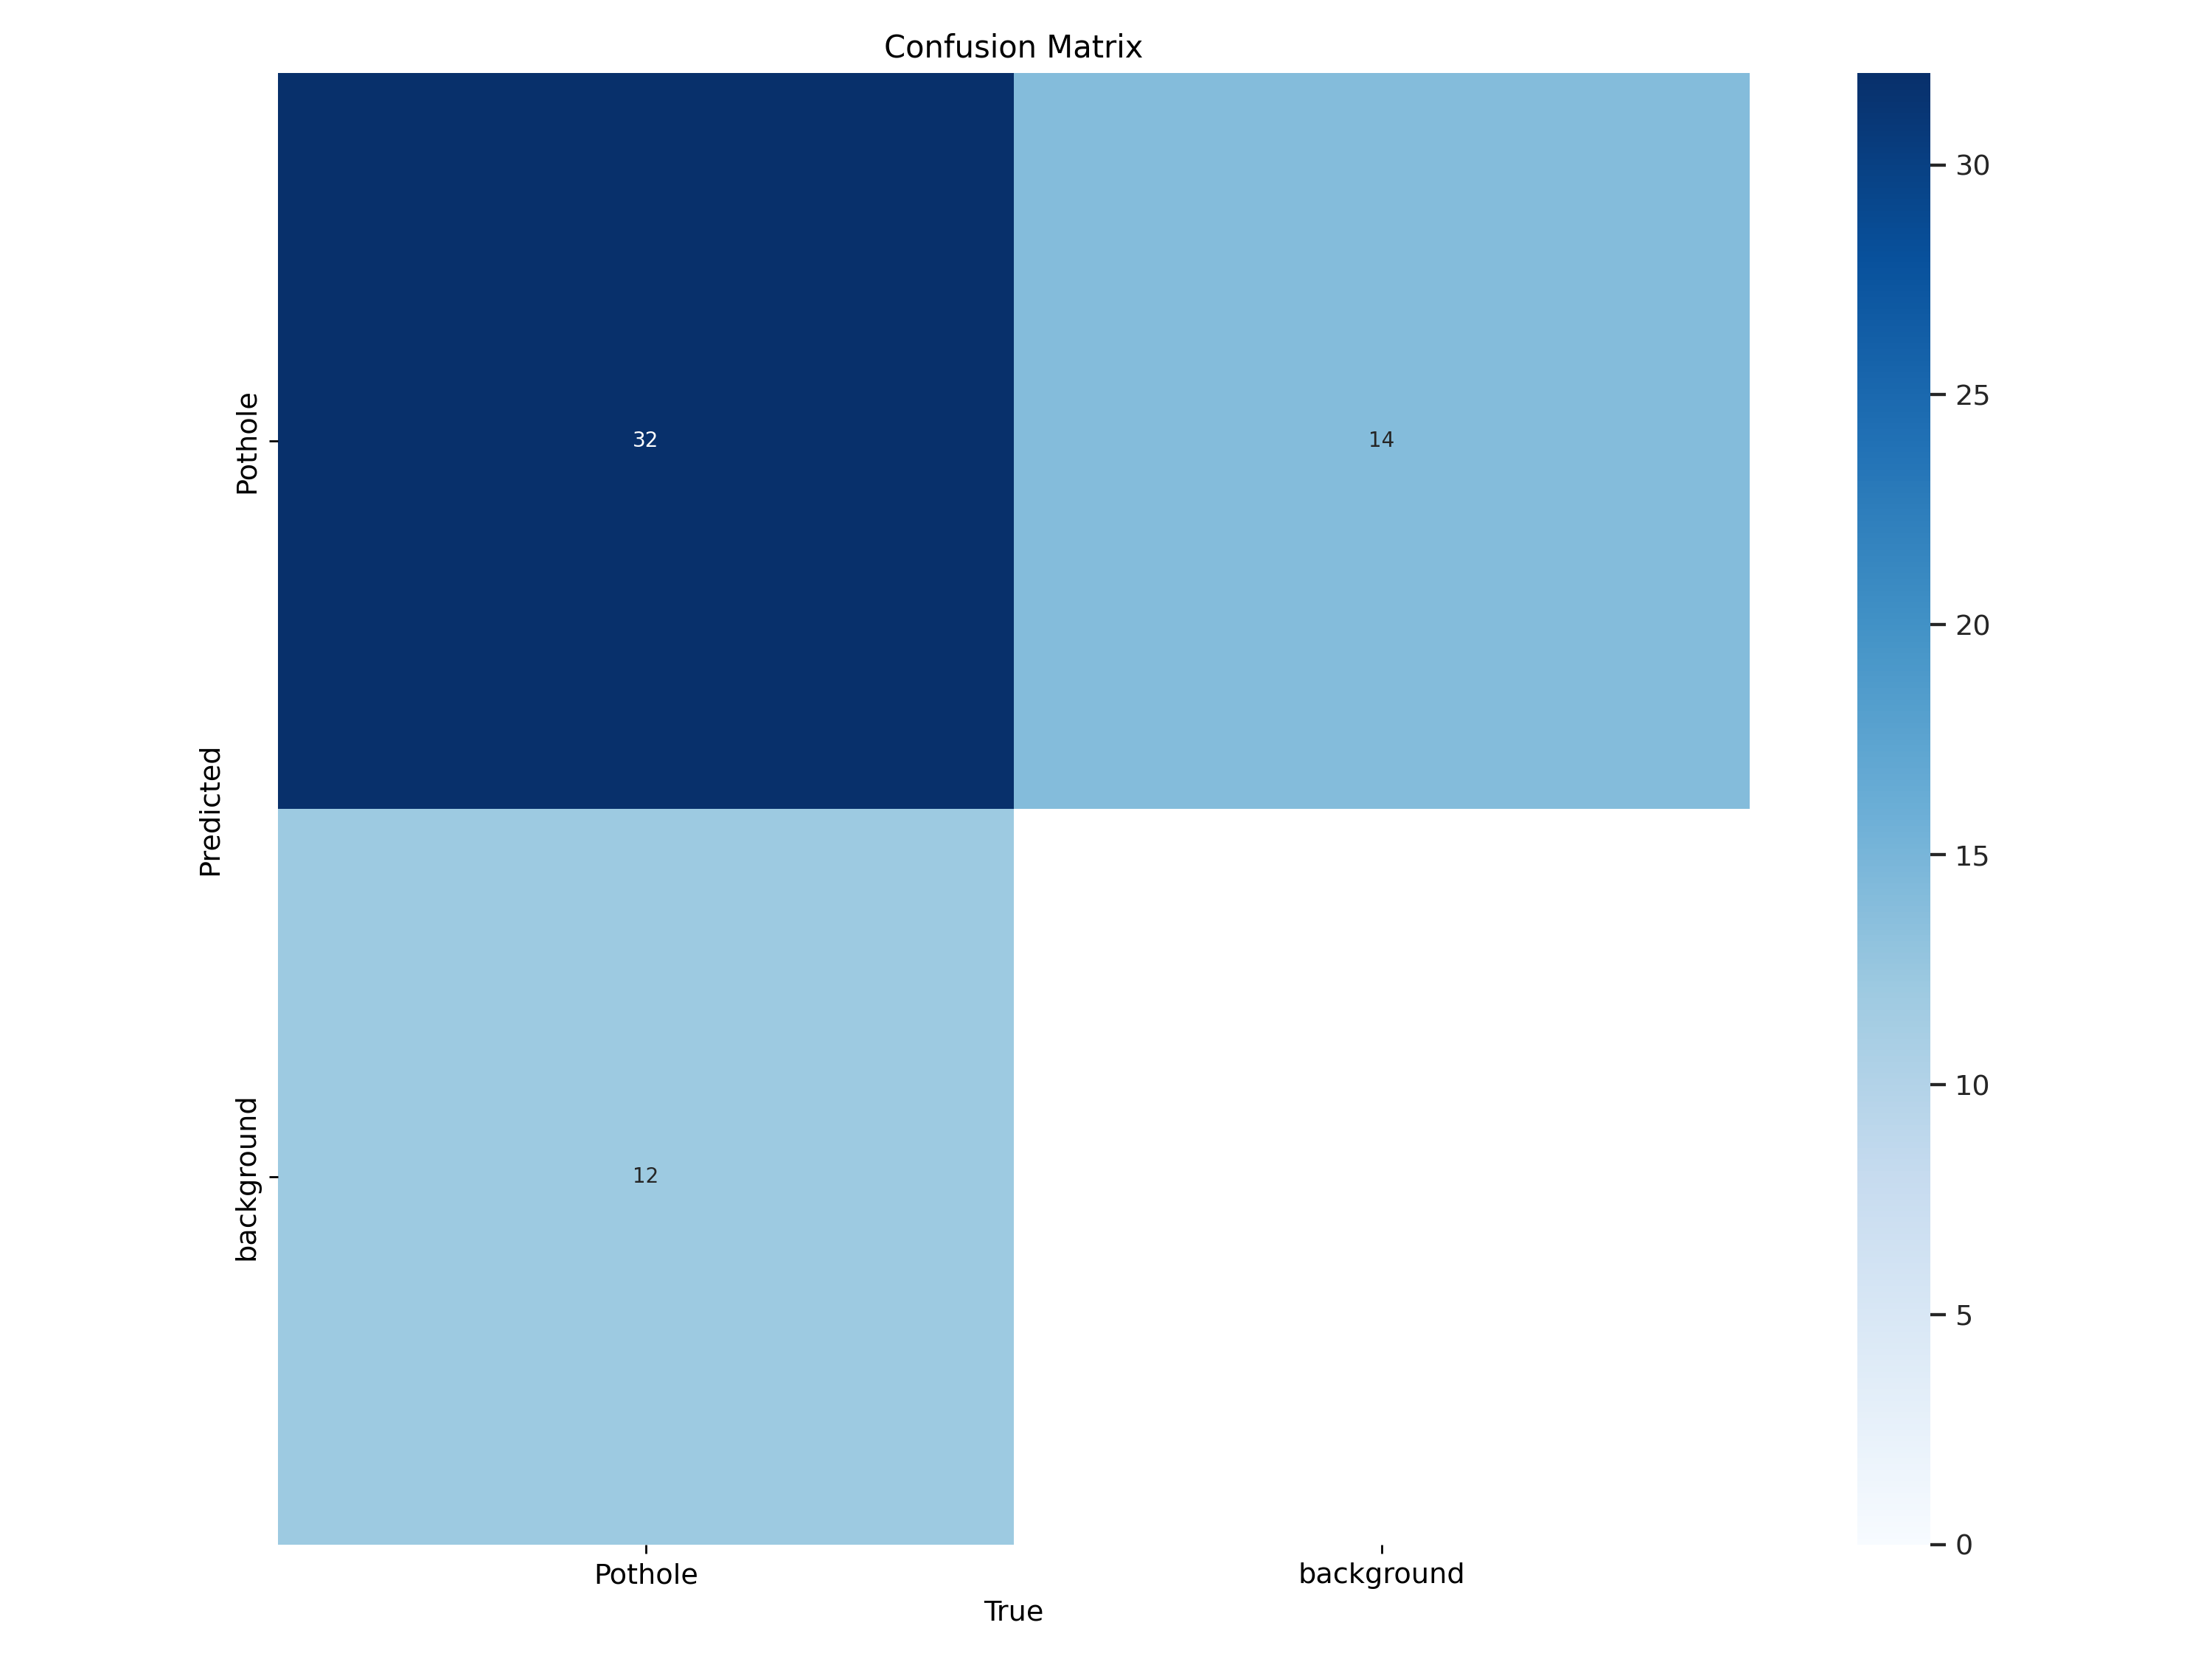

In [ ]:
%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/confusion_matrix.png', width = 900)

/content


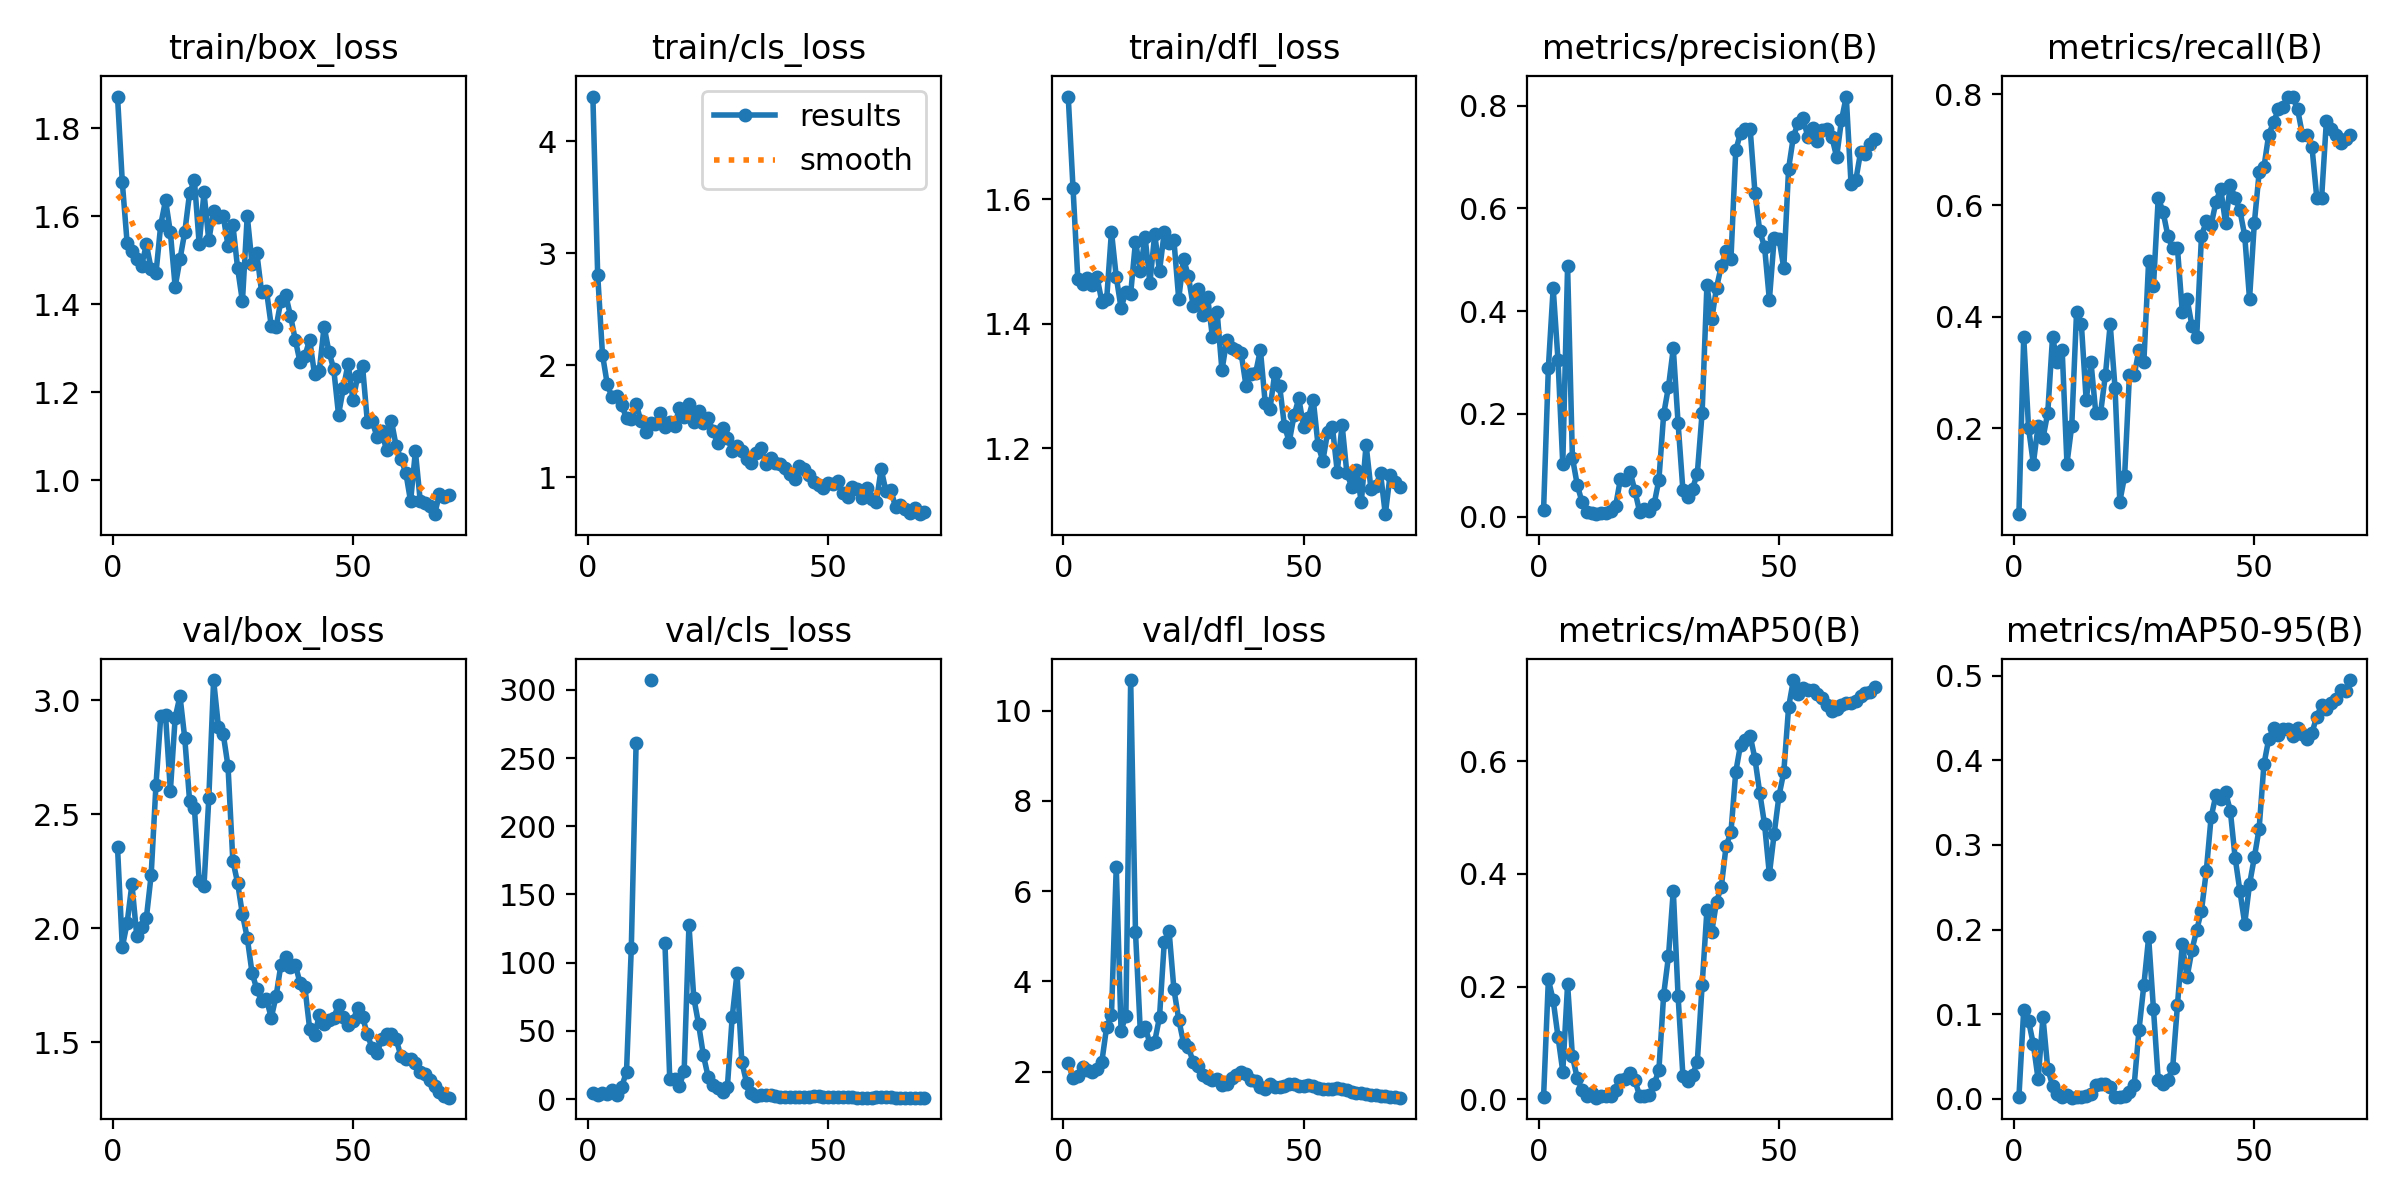

In [ ]:
%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/results.png', width = 600)

/content


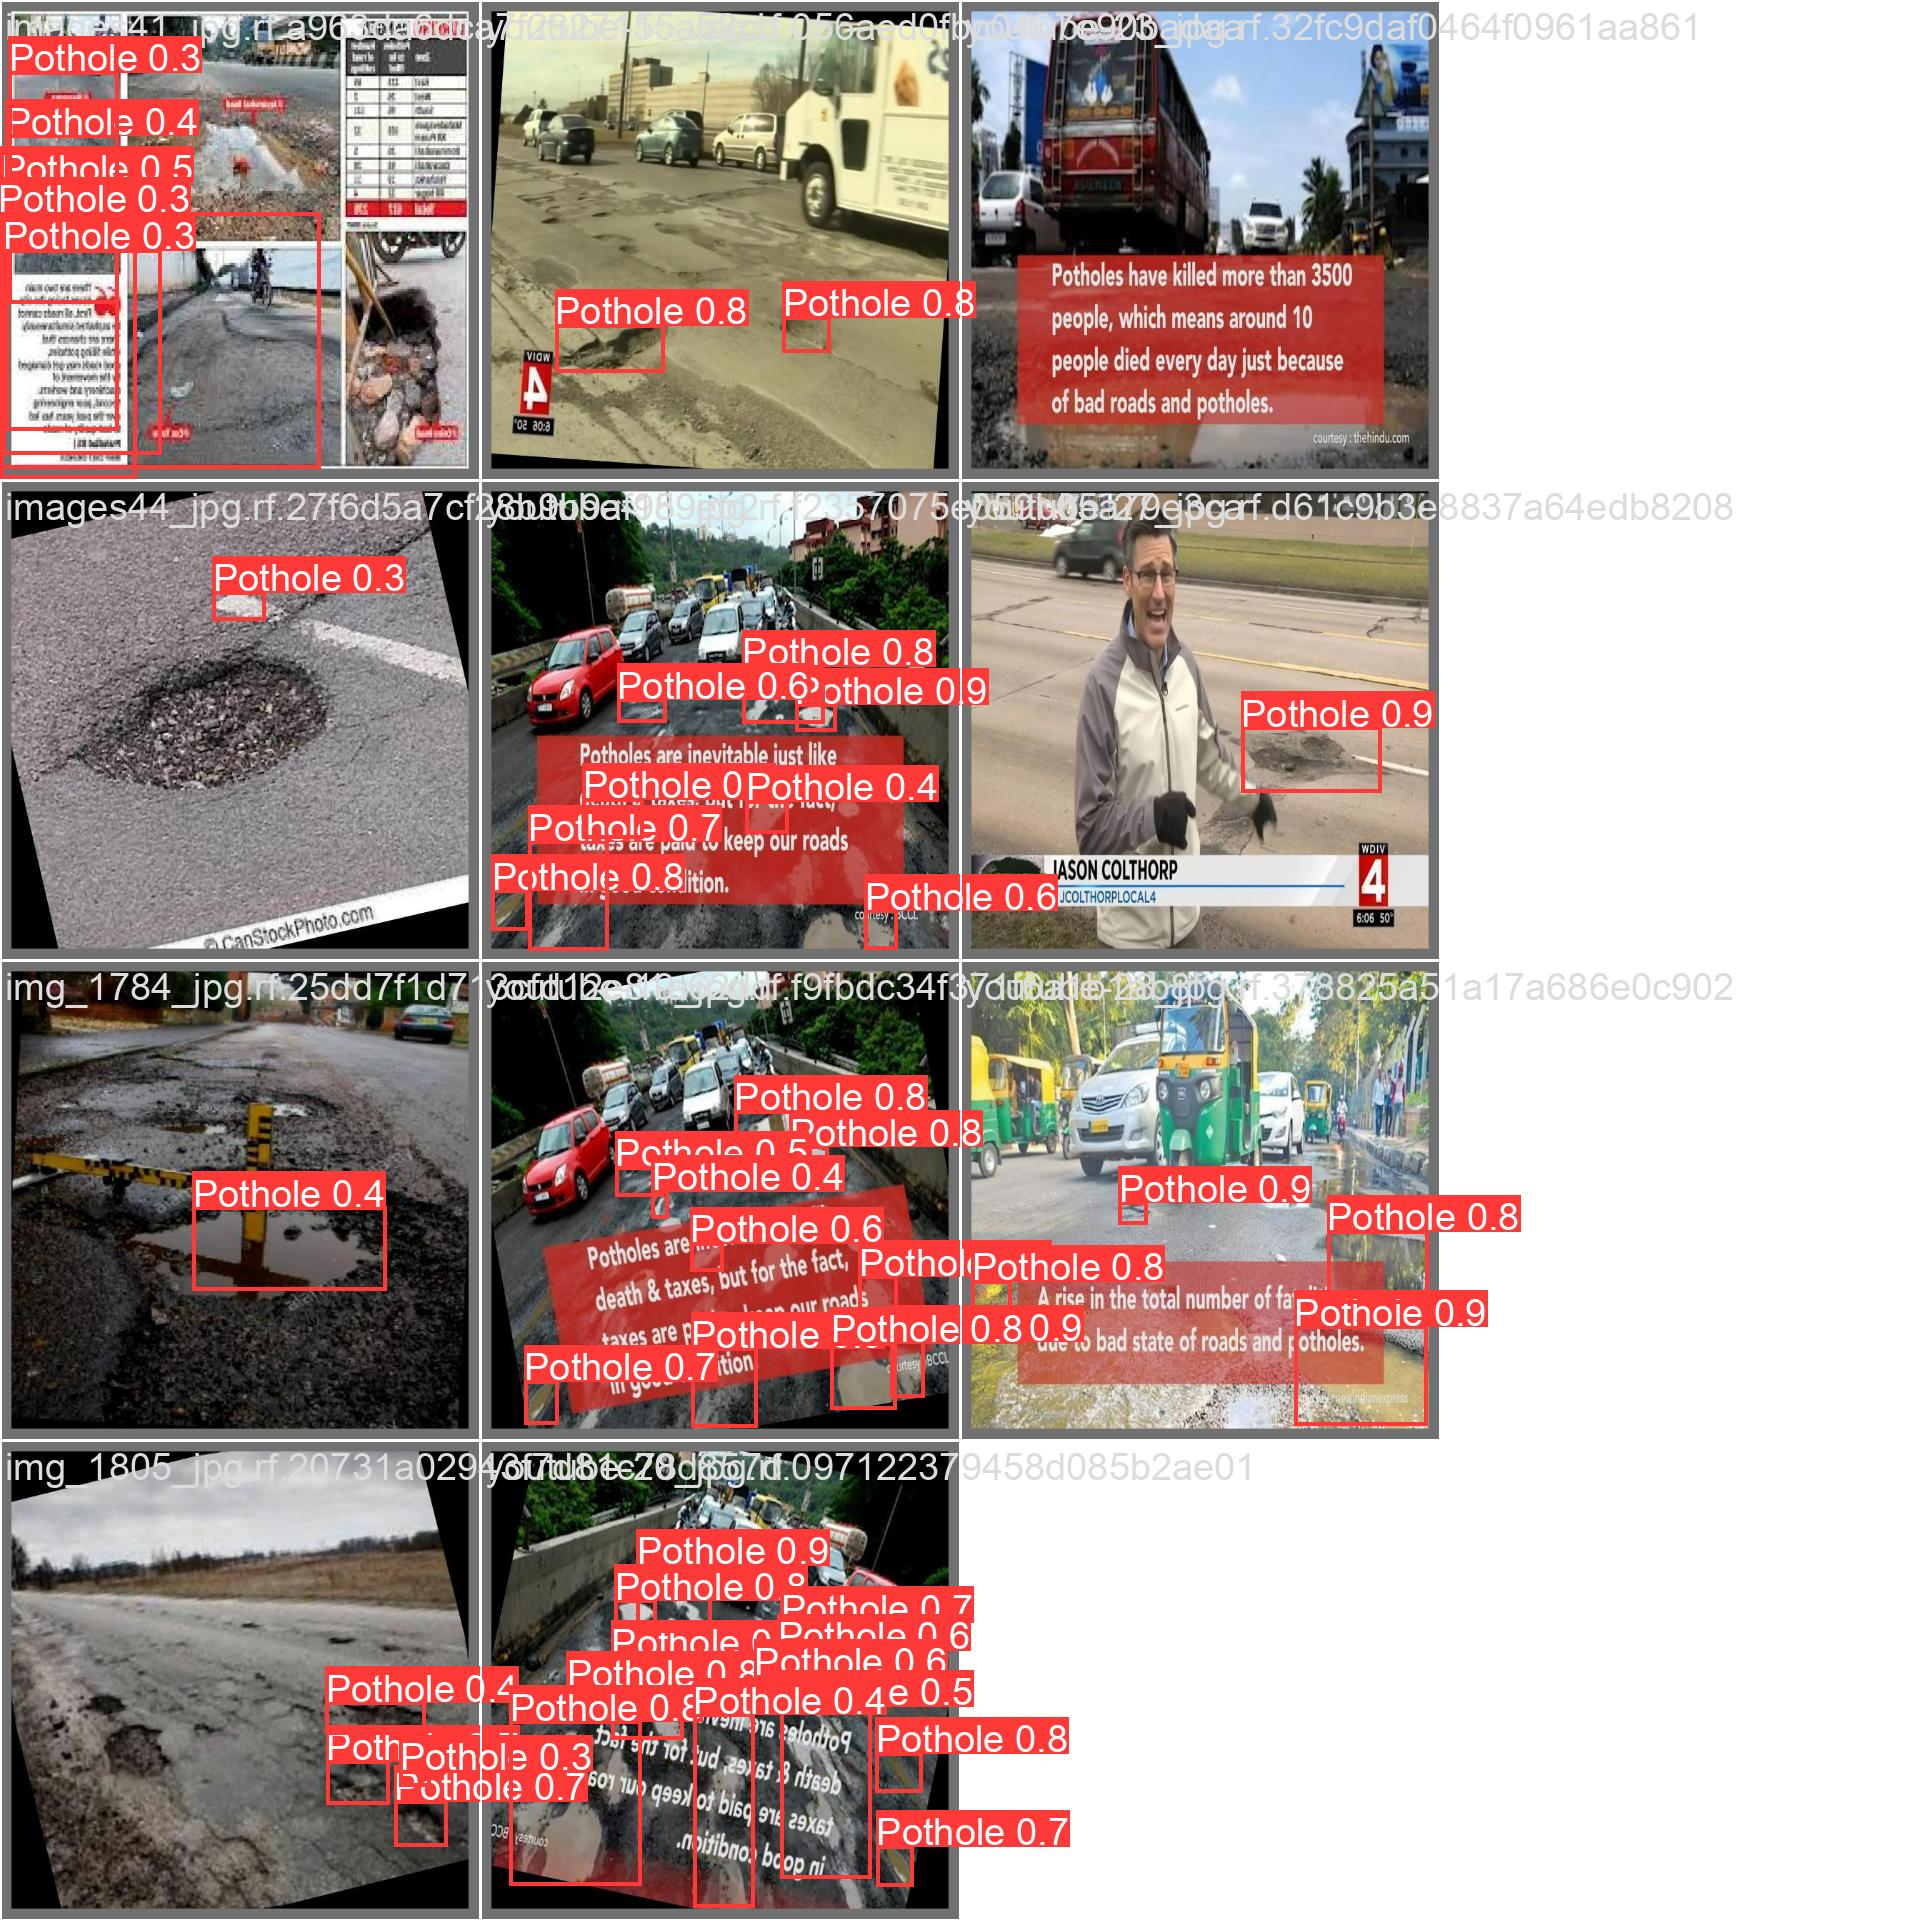

In [ ]:
%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width = 600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/potholedetection/data.yaml

/content
Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/potholedetection/valid/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100% 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.03s/it]
                   all         11         44      0.735      0.727      0.732      0.495
Speed: 0.2ms preprocess, 38.8ms inference, 0.0ms loss, 17.5ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/potholedetection/test/images

/content
Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/12 /content/drive/MyDrive/potholedetection/test/images/images41_jpg.rf.11026da73060bd1db20f3a83286d480b.jpg: 640x640 2 Potholes, 37.1ms
image 2/12 /content/drive/MyDrive/potholedetection/test/images/images59_jpg.rf.ab0687e6f4bc51f2628866bf797b56d6.jpg: 640x640 (no detections), 37.1ms
image 3/12 /content/drive/MyDrive/potholedetection/test/images/images74_jpg.rf.628b2f6ecbf356138c6f1b67bf7cc490.jpg: 640x640 1 Pothole, 37.1ms
image 4/12 /content/drive/MyDrive/potholedetection/test/images/images96_jpg.rf.1d0dcb3b46980a6f1ebec5c6843943c8.jpg: 640x640 (no detections), 37.1ms
image 5/12 /content/drive/MyDrive/potholedetection/test/images/img_0988_jpg.rf.df15ce39251c1b2c31a7c29f5441c623.jpg: 640x640 2 Potholes, 37.0ms
image 6/12 /content/drive/MyDrive/potholedetection/test/images/img_1797_jpg.rf.83b3958fd7d89

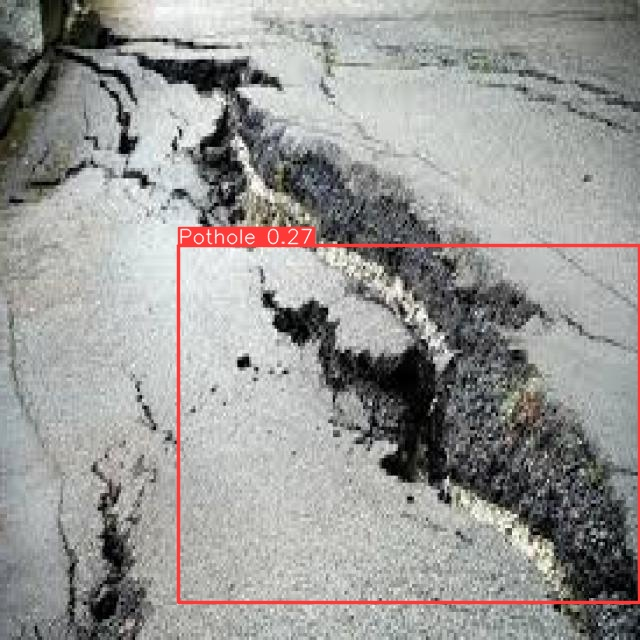

In [ ]:
Image('/content/runs/detect/predict/images74_jpg.rf.628b2f6ecbf356138c6f1b67bf7cc490.jpg')


In [ ]:
%cd {HOME}

!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/demo.mp4'

/content
Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/324) /content/drive/MyDrive/demo.mp4: 384x640 3 Potholes, 124.8ms
video 1/1 (2/324) /content/drive/MyDrive/demo.mp4: 384x640 2 Potholes, 25.8ms
video 1/1 (3/324) /content/drive/MyDrive/demo.mp4: 384x640 2 Potholes, 25.7ms
video 1/1 (4/324) /content/drive/MyDrive/demo.mp4: 384x640 2 Potholes, 25.7ms
video 1/1 (5/324) /content/drive/MyDrive/demo.mp4: 384x640 (no detections), 25.7ms
video 1/1 (6/324) /content/drive/MyDrive/demo.mp4: 384x640 1 Pothole, 25.7ms
video 1/1 (7/324) /content/drive/MyDrive/demo.mp4: 384x640 3 Potholes, 25.7ms
video 1/1 (8/324) /content/drive/MyDrive/demo.mp4: 384x640 1 Pothole, 25.7ms
video 1/1 (9/324) /content/drive/MyDrive/demo.mp4: 384x640 3 Potholes, 24.0ms
video 1/1 (10/324) /content/drive/MyDrive/demo.mp4: 384x640 2 Potholes, 18.6ms
video 1/1 (11/324) /content/drive/My